In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
from collections import OrderedDict

class Picture:
    def __init__(self,bins,xlabel,yscale='linear'):
        self.bins = bins
        self.xlabel = xlabel
        self.yscale = yscale
        
class Bkg:
    def __init__(self,label,color,cross_section,n0=1000000):
    #截面单位pb,亮度单位fb^(-1),n0表示最开始产生的事例数
        self.label = label
        self.color = color
        self.cross_section = cross_section
        self.data = []
        self.n0 = n0
        self.luminosity = 3000
    def scale(self):
        return(1000*self.cross_section*self.luminosity/self.n0)
    def n_events(self):
        return(self.data.shape[0]*self.scale())
    
class Sgn(Bkg):
    def __init__(self,label,color,cross_section):
        super().__init__(label,color,cross_section)
        

def cut(data0):
    return(data0.loc[(data0['ET_miss'] > 0)])

def significance(bkgs,sgn):
    n_bkg = sum(bkgs[bkg].n_events() for bkg in bkgs.keys())
    n_sgn = sgn.n_events()
    signi = n_sgn/math.sqrt(n_bkg + n_sgn)
    s_over_b = n_sgn/n_bkg
    BR_h = math.sqrt(2*math.sqrt(n_bkg)/n_sgn)
    print('========SIGNAL========')
    print('Signal:\t'+str(sgn.n_events()))
    print('======BACKGROUND======')
    for bkg in bkgs.keys():
        print(bkg+':\t'+str(bkgs[bkg].n_events()))
    print('Total BKG:\t'+str(n_bkg))
    print('=====SIGNIFICANCE=====')
    print('Significance:\t'+str(signi))
    print('S/B:\t'+str(s_over_b))
    print('BR_h_min:\t'+str(BR_h))

def draw_stack(pictures,bkgs,sgn,nn):
#nn用于表示画布分为几行几列，例如2行3列输入mn=230
    fig = plt.figure(figsize=(10, 8))
    for picture in pictures.keys():
        nn = nn+1
        bins0 = pictures[picture].bins
        xx = np.array([bins0[:-1],bins0[1:]]).ravel(order='F')
        yyl = np.zeros_like(xx)
        ax = fig.add_subplot(nn)
        ax.set_xlim(bins0[0],bins0[-1])
        ax.set_xlabel(pictures[picture].xlabel)
        ax.set_yscale(pictures[picture].yscale)

        for bkg in bkgs.keys():
            high = bkgs[bkg].scale()*np.histogram(bkgs[bkg].data[picture],bins=bins0)[0]
            yyh = np.array([high,high]).ravel(order='F')+yyl
            ax.fill_between(xx,yyl,yyh,label=bkgs[bkg].label,color=bkgs[bkg].color)
            yyl = yyh
            
        ax.hist(sgn.data[picture],bins=bins0,edgecolor=sgn.color,
                histtype='step',label=sgn.label,
                weights=np.full_like(sgn.data[picture],10.*sgn.scale()))#图中信号的高低可以在这里调整
        
        handles,labels = ax.get_legend_handles_labels()
        ax.legend(
            handles[::-1],labels[::-1],
            loc='upper right',
            bbox_to_anchor=(1,1),
            ncol=2,
            fontsize=10,
            handlelength=1,
            handletextpad=0.2,
            labelspacing=0.2,
            columnspacing=1,
            frameon= False
        )
    fig.tight_layout()#调整子图间距
    plt.savefig('TT300.png')
    plt.show()

#信号
sgn = Sgn('TT_hh300','red',0.0252)
sgn.data = cut(pd.read_csv('TT_hh300.csv'))

# 定义一些背景
bkgs = OrderedDict()
# bkgs['TT_bbtata'] = Bkg('bbtata','#C5E1A5',29.19)
bkgs['TT_zjj'] = Bkg('zjj','#81D4FA',182.6)
bkgs['TT_zjjj'] = Bkg('zjjj','#03A9F4',74.88)
# bkgs['TT_diboson'] = Bkg('diboson','#9FA8DA',0.56)
# bkgs['TT_single_t_tw'] = Bkg('single_t_tw','#D7CCC8',9.28)
# bkgs['TT_single_t_st'] = Bkg('single_t_st','#BCAAA4',84.96)
# bkgs['TT_tth'] = Bkg(r'$tth$','#FFCDD2',0.48,500000)
# bkgs['TT_ttz'] = Bkg(r'$ttz$','#EF9A9A',0.7072,500000)
# bkgs['TT_tt'] = Bkg(r'$tt$','#FFCC80',66.31,2000000)

for bkg in bkgs.keys():
    bkgs[bkg].data = cut(pd.read_csv(bkg+'.csv'))

# 定义一些图
pictures = OrderedDict()
pictures['ET_miss'] = Picture(np.linspace(0,800.,41),'ET_miss')
pictures['m_bb'] = Picture(np.linspace(0,400.,51),'m_bb')
pictures['m_tautau'] = Picture(np.linspace(0,400.,51),'m_tautau')
# pictures['m_HH'] = Picture(np.linspace(0,1200.,51),'m_HH')
# pictures['deltaR_bb'] = Picture(np.linspace(0,6.,51),'deltaR_bb')
# pictures['deltaR_tautau'] = Picture(np.linspace(0,6.,51),'deltaR_tautau')
# pictures['mT2_l'] = Picture(np.linspace(0,800.,51),'mT2_l')
# pictures['mT2_b'] = Picture(np.linspace(0,800.,51),'mT2_b')
pictures['mT2_min'] = Picture(np.linspace(0,800.,51),'mT2_min')

significance(bkgs,sgn)
draw_stack(pictures,bkgs,sgn,nn=220)

========SIGNAL========
Signal:	6149.1528
======BACKGROUND======
TT_zjj:	218024.4
TT_zjjj:	185328.0
Total BKG:	403352.4
=====SIGNIFICANCE=====
Significance:	9.609206103863073
S/B:	0.015245112710374351
BR_h_min:	0.4544943793088785


========SIGNAL========
Signal:	6149.1528
======BACKGROUND======
TT_bbtata:	269015.04
TT_diboson:	9890.16
TT_zjj:	218024.4
TT_zjjj:	185328.0
TT_tth:	11819.52
TT_ttz:	9725.4144
TT_single_t_tw:	69405.12
TT_single_t_st:	128969.28
TT_tt:	1111024.05
Total BKG:	2013200.9844
=====SIGNIFICANCE=====
Significance:	4.3272249332219666
S/B:	0.0030544157526490824
BR_h_min:	0.6793274111043232


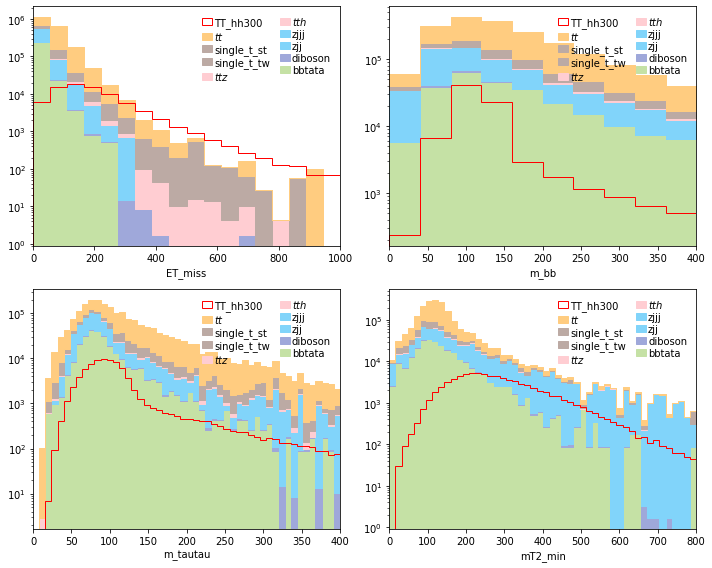

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
from collections import OrderedDict

class Picture:
    def __init__(self,bins,xlabel,yscale='log'):
        self.bins = bins
        self.xlabel = xlabel
        self.yscale = yscale
        
class Bkg:
    def __init__(self,label,color,cross_section,n0=1000000):
    #截面单位pb,亮度单位fb^(-1),n0表示最开始产生的事例数
        self.label = label
        self.color = color
        self.cross_section = cross_section
        self.data = []
        self.n0 = n0
        self.luminosity = 3000
    def scale(self):
        return(1000*self.cross_section*self.luminosity/self.n0)
    def n_events(self):
        return(self.data.shape[0]*self.scale())
    
class Sgn(Bkg):
    def __init__(self,label,color,cross_section):
        super().__init__(label,color,cross_section)
        

def cut(data0):
    return(data0.loc[(data0['ET_miss'] > 0)])

def significance(bkgs,sgn):
    n_bkg = sum(bkgs[bkg].n_events() for bkg in bkgs.keys())
    n_sgn = sgn.n_events()
    signi = n_sgn/math.sqrt(n_bkg + n_sgn)
    s_over_b = n_sgn/n_bkg
    BR_h = math.sqrt(2*math.sqrt(n_bkg)/n_sgn)
    print('========SIGNAL========')
    print('Signal:\t'+str(sgn.n_events()))
    print('======BACKGROUND======')
    for bkg in bkgs.keys():
        print(bkg+':\t'+str(bkgs[bkg].n_events()))
    print('Total BKG:\t'+str(n_bkg))
    print('=====SIGNIFICANCE=====')
    print('Significance:\t'+str(signi))
    print('S/B:\t'+str(s_over_b))
    print('BR_h_min:\t'+str(BR_h))

#信号
sgn = Sgn('TT_hh300','red',0.0252)
sgn.data = cut(pd.read_csv('TT_hh300.csv'))

# 定义一些背景
bkgs = OrderedDict()
bkgs['TT_bbtata'] = Bkg('bbtata','#C5E1A5',29.19)
bkgs['TT_diboson'] = Bkg('diboson','#9FA8DA',0.56)
bkgs['TT_zjj'] = Bkg('zjj','#81D4FA',182.6)
bkgs['TT_zjjj'] = Bkg('zjjj','#81D4FA',74.88)
bkgs['TT_tth'] = Bkg(r'$tth$','#FFCDD2',0.48,500000)
bkgs['TT_ttz'] = Bkg(r'$ttz$','#FFCDD2',0.7072,500000)
bkgs['TT_single_t_tw'] = Bkg('single_t_tw','#BCAAA4',9.28)
bkgs['TT_single_t_st'] = Bkg('single_t_st','#BCAAA4',84.96)
bkgs['TT_tt'] = Bkg(r'$tt$','#FFCC80',66.31,2000000)

for bkg in bkgs.keys():
    bkgs[bkg].data = cut(pd.read_csv(bkg+'.csv'))

# 定义一些图
pictures = OrderedDict()
pictures['ET_miss'] = Picture(np.linspace(0.,1000.,19),'ET_miss')
pictures['m_bb'] = Picture(np.linspace(0,400.,11),'m_bb')
pictures['m_tautau'] = Picture(np.linspace(0,400.,51),'m_tautau')
# pictures['deltaR_bb'] = Picture(np.linspace(0,6.,51),'deltaR_bb')
# pictures['deltaR_tautau'] = Picture(np.linspace(0,6.,51),'deltaR_tautau')
# pictures['mT2_l'] = Picture(np.linspace(0,800.,51),'mT2_l')
# pictures['mT2_b'] = Picture(np.linspace(0,800.,51),'mT2_b')
pictures['mT2_min'] = Picture(np.linspace(0,800.,51),'mT2_min')

significance(bkgs,sgn)

#nn用于表示画布分为几行几列，例如2行3列输入mn=230
fig = plt.figure(figsize=(10, 8))
nn=220
for picture in pictures.keys():
    nn = nn+1
    bins0 = pictures[picture].bins
    xx = np.array([bins0[:-1],bins0[1:]]).ravel(order='F')
    yyl = np.zeros_like(xx)
    ax = fig.add_subplot(nn)
    ax.set_xlim(bins0[0],bins0[-1])
    ax.set_xlabel(pictures[picture].xlabel)
    ax.set_yscale(pictures[picture].yscale)

    for bkg in bkgs.keys():
        high = bkgs[bkg].scale()*np.histogram(bkgs[bkg].data[picture],bins=bins0)[0]
        yyh = np.array([high,high]).ravel(order='F')+yyl
        ax.fill_between(xx,yyl,yyh,label=bkgs[bkg].label,color=bkgs[bkg].color)
        yyl = yyh
            
    ax.hist(sgn.data[picture],bins=bins0,edgecolor=sgn.color,
            histtype='step',label=sgn.label)
        
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(
        handles[::-1],labels[::-1],
        loc='upper right',
        bbox_to_anchor=(1,1),
        ncol=2,
        fontsize=10,
        handlelength=1,
        handletextpad=0.2,
        labelspacing=0.2,
        columnspacing=1,
        frameon= False
    )
fig.tight_layout()#调整子图间距
plt.savefig('TT300.png')
plt.show()


In [20]:
from matplotlib import rc, rcParams
from matplotlib.image import NonUniformImage
from matplotlib import cm, ticker
from matplotlib.font_manager import FontProperties
import matplotlib
config = {
    "font.family": ["serif", "Times New Roman"],
    "font.size": 20,
    "mathtext.fontset": 'stix',
    "font.serif": ['Computer Modern'],
    "text.latex.preamble": r"\usepackage{amsmath}"
}
rcParams.update(config)
plt.rcParams['axes.formatter.min_exponent'] = 2

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import matplotlib.lines as mlines
from collections import OrderedDict

class Bkg:
    def __init__(self,label,color,cross_section,n0=1000000):
    #截面单位pb,亮度单位fb^(-1),n0表示最开始产生的事例数
        self.label = label
        self.color = color
        self.cross_section = cross_section
        self.data = []
        self.n0 = n0
        self.luminosity = 3000
    def scale(self):
        return(1000*self.cross_section*self.luminosity/self.n0)
    def n_events(self):
        return(self.data.shape[0]*self.scale())

class Sgn(Bkg):
    def __init__(self,label,color,cross_section):
        super().__init__(label,color,cross_section)
        
def cut(data0):
    return(data0.loc[(data0['ET_miss'] > 0)]) 

#信号
sgn = Sgn('TT_hh600','r',0.0252)
sgn.data = cut(pd.read_csv('TT_hh600.csv'))

# 定义一些背景
bkgs = OrderedDict()
bkgs['TT_bbtata'] = Bkg('bbtata','#FFEB3B',29.19)
bkgs['TT_diboson'] = Bkg('diboson','#03A9F4',0.56)
bkgs['TT_zjj'] = Bkg('zjj','#00FF00',182.6)
bkgs['TT_zjjj'] = Bkg('zjjj','#4CAF50',74.88)
bkgs['TT_tth'] = Bkg(r'$tth$','#607D8B',0.48,500000)
bkgs['TT_ttz'] = Bkg(r'$ttz$','#607D8B',0.7072,500000)
bkgs['TT_single_t_tw'] = Bkg('single_t_tw','b',9.28)
bkgs['TT_single_t_st'] = Bkg('single_t_st','b',84.96)
bkgs['TT_tt'] = Bkg(r'$tt$','#FF9800',66.31,2000000)
for bkg in bkgs.keys():
    bkgs[bkg].data = cut(pd.read_csv(bkg+'.csv'))

picture = 'ET_miss'
set_bins = 40
set_range = (0.,400.)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.16, 0.16, 0.81, 0.81])
ax.set_xlim(0.,400.)
w_tth = np.full_like(bkgs['TT_tth'].data[picture],bkgs['TT_tth'].scale())
w_ttz = np.full_like(bkgs['TT_ttz'].data[picture],bkgs['TT_ttz'].scale())
ax.hist([bkgs['TT_tth'].data[picture],bkgs['TT_ttz'].data[picture]], bins=set_bins,range=set_range,weights=[w_tth,w_ttz],
            histtype='step',density=True,stacked=True,color=["None",bkgs['TT_tth'].color],linewidth=2.5,ls=':')

w_ttw = np.full_like(bkgs['TT_single_t_tw'].data[picture],bkgs['TT_single_t_tw'].scale())
w_tst = np.full_like(bkgs['TT_single_t_st'].data[picture],bkgs['TT_single_t_st'].scale())
ax.hist([bkgs['TT_single_t_tw'].data[picture],bkgs['TT_single_t_st'].data[picture]], bins=set_bins,range=set_range,weights=[w_ttw,w_tst],
            histtype='step',density=True,stacked=True,color=["None",bkgs['TT_single_t_tw'].color],linewidth=1.25)

ax.hist(bkgs['TT_diboson'].data[picture], bins=set_bins,edgecolor=bkgs['TT_diboson'].color,range=set_range,
            histtype='step',density=True,linewidth=2,ls='-.')

w_zjj = np.full_like(bkgs['TT_zjj'].data[picture],bkgs['TT_zjj'].scale())
w_zjjj = np.full_like(bkgs['TT_zjjj'].data[picture],bkgs['TT_zjjj'].scale())
ax.hist([bkgs['TT_zjj'].data[picture],bkgs['TT_zjjj'].data[picture]], bins=set_bins,range=set_range,weights=[w_zjj,w_zjjj],
            histtype='step',density=True,stacked=True,color=["None", bkgs['TT_zjj'].color],linewidth=1.25)

ax.hist(bkgs['TT_bbtata'].data[picture], bins=set_bins,edgecolor=bkgs['TT_bbtata'].color,range=set_range,
            histtype='step',density=True,linewidth=1)

ax.hist(bkgs['TT_tt'].data[picture], bins=set_bins,edgecolor=bkgs['TT_tt'].color,
            histtype='step',density=True,linewidth=1.5,ls='--')

ax.hist(sgn.data[picture],bins=set_bins,edgecolor=sgn.color,range=set_range,
            histtype='step',density=True,linewidth=2)

sgn_line = mlines.Line2D([], [], color=sgn.color, linewidth=2,label=r'${\rm S(600)}$')
tt_line = mlines.Line2D([], [], color=bkgs['TT_tt'].color, linewidth=2,label=r'$t \bar t$',ls='--')
bbtata_line = mlines.Line2D([], [], color=bkgs['TT_bbtata'].color, linewidth=2,label=r'$bb\tau\tau$')
zjets_line = mlines.Line2D([], [], color=bkgs['TT_zjj'].color,linewidth=2,label=r'$Z+{\rm jets}$')
diboson_line = mlines.Line2D([], [], color=bkgs['TT_diboson'].color, linewidth=2,label=r'${\rm diboson}$',ls='-.')
singlet_line = mlines.Line2D([], [], color=bkgs['TT_single_t_tw'].color, linewidth=2,label=r'${\rm single-}t$')
ttx_line = mlines.Line2D([], [], color=bkgs['TT_tth'].color, linewidth=2,label=r'$t \bar t X$',ls=':')
# plt.legend(handles=[sgn_line,tt_line,bbtata_line,zjets_line,diboson_line,singlet_line,ttx_line])
ax.legend(
    handles=[sgn_line,tt_line,bbtata_line,zjets_line,diboson_line,singlet_line,ttx_line],
    loc='upper right',
    bbox_to_anchor=(1,1),
    ncol=2,
    fontsize=20,
    handlelength=2,
    handletextpad=0.2,
    labelspacing=0.2,
    columnspacing=1,
    frameon= False
)

ax.set_xlabel(r"$E_{\rm T}^{\rm miss}~[{\rm GeV}]$", fontsize=30, loc='right')
ax.set_ylabel(r"${\rm Events~(scale~to~one)}$", fontsize=30, loc='top')

plt.minorticks_on()
ax.tick_params(which='both', direction="out", labelsize=18)
ax.tick_params(which="major", length=10, width=1.2)
ax.tick_params(which="minor", length=4, width=1.2) 

plt.savefig('ET.png')

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

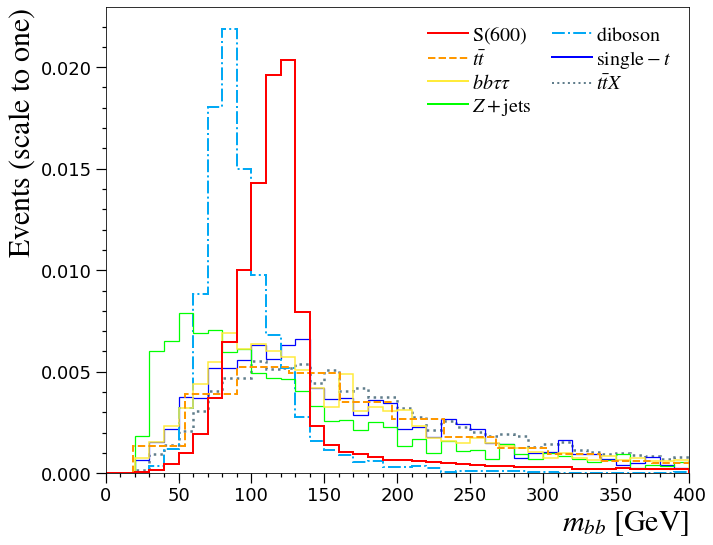

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import matplotlib.lines as mlines
from collections import OrderedDict

class Bkg:
    def __init__(self,label,color,cross_section,n0=1000000):
    #截面单位pb,亮度单位fb^(-1),n0表示最开始产生的事例数
        self.label = label
        self.color = color
        self.cross_section = cross_section
        self.data = []
        self.n0 = n0
        self.luminosity = 3000
    def scale(self):
        return(1000*self.cross_section*self.luminosity/self.n0)
    def n_events(self):
        return(self.data.shape[0]*self.scale())

class Sgn(Bkg):
    def __init__(self,label,color,cross_section):
        super().__init__(label,color,cross_section)
        
def cut(data0):
    return(data0.loc[(data0['ET_miss'] > 0)]) 

#信号
sgn = Sgn('TT_hh600','r',0.0252)
sgn.data = cut(pd.read_csv('TT_hh600.csv'))

# 定义一些背景
bkgs = OrderedDict()
bkgs['TT_bbtata'] = Bkg('bbtata','#FFEB3B',29.19)
bkgs['TT_diboson'] = Bkg('diboson','#03A9F4',0.56)
bkgs['TT_zjj'] = Bkg('zjj','#00FF00',182.6)
bkgs['TT_zjjj'] = Bkg('zjjj','#4CAF50',74.88)
bkgs['TT_tth'] = Bkg(r'$tth$','#607D8B',0.48,500000)
bkgs['TT_ttz'] = Bkg(r'$ttz$','#607D8B',0.7072,500000)
bkgs['TT_single_t_tw'] = Bkg('single_t_tw','b',9.28)
bkgs['TT_single_t_st'] = Bkg('single_t_st','b',84.96)
bkgs['TT_tt'] = Bkg(r'$tt$','#FF9800',66.31,2000000)
for bkg in bkgs.keys():
    bkgs[bkg].data = cut(pd.read_csv(bkg+'.csv'))

picture = 'm_bb'
set_bins = 40
set_range = (0.,400.)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.16, 0.16, 0.81, 0.81])
ax.set_xlim(0.,400.)
w_tth = np.full_like(bkgs['TT_tth'].data[picture],bkgs['TT_tth'].scale())
w_ttz = np.full_like(bkgs['TT_ttz'].data[picture],bkgs['TT_ttz'].scale())
ax.hist([bkgs['TT_tth'].data[picture],bkgs['TT_ttz'].data[picture]], bins=set_bins,range=set_range,weights=[w_tth,w_ttz],
            histtype='step',density=True,stacked=True,color=["None",bkgs['TT_tth'].color],linewidth=2.5,ls=':')

w_ttw = np.full_like(bkgs['TT_single_t_tw'].data[picture],bkgs['TT_single_t_tw'].scale())
w_tst = np.full_like(bkgs['TT_single_t_st'].data[picture],bkgs['TT_single_t_st'].scale())
ax.hist([bkgs['TT_single_t_tw'].data[picture],bkgs['TT_single_t_st'].data[picture]], bins=set_bins,range=set_range,weights=[w_ttw,w_tst],
            histtype='step',density=True,stacked=True,color=["None",bkgs['TT_single_t_tw'].color],linewidth=1.25)

ax.hist(bkgs['TT_diboson'].data[picture], bins=set_bins,edgecolor=bkgs['TT_diboson'].color,range=set_range,
            histtype='step',density=True,linewidth=2,ls='-.')

w_zjj = np.full_like(bkgs['TT_zjj'].data[picture],bkgs['TT_zjj'].scale())
w_zjjj = np.full_like(bkgs['TT_zjjj'].data[picture],bkgs['TT_zjjj'].scale())
ax.hist([bkgs['TT_zjj'].data[picture],bkgs['TT_zjjj'].data[picture]], bins=set_bins,range=set_range,weights=[w_zjj,w_zjjj],
            histtype='step',density=True,stacked=True,color=["None", bkgs['TT_zjj'].color],linewidth=1.25)

ax.hist(bkgs['TT_bbtata'].data[picture], bins=set_bins,edgecolor=bkgs['TT_bbtata'].color,range=set_range,
            histtype='step',density=True,linewidth=1.5)

ax.hist(bkgs['TT_tt'].data[picture], bins=set_bins,edgecolor=bkgs['TT_tt'].color,
            histtype='step',density=True,linewidth=2,ls='--')

ax.hist(sgn.data[picture],bins=set_bins,edgecolor=sgn.color,range=set_range,
            histtype='step',density=True,linewidth=2)

sgn_line = mlines.Line2D([], [], color=sgn.color, linewidth=2,label=r'${\rm S(600)}$')
tt_line = mlines.Line2D([], [], color=bkgs['TT_tt'].color, linewidth=2,label=r'$t \bar t$',ls='--')
bbtata_line = mlines.Line2D([], [], color=bkgs['TT_bbtata'].color, linewidth=2,label=r'$bb\tau\tau$')
zjets_line = mlines.Line2D([], [], color=bkgs['TT_zjj'].color,linewidth=2,label=r'$Z+{\rm jets}$')
diboson_line = mlines.Line2D([], [], color=bkgs['TT_diboson'].color, linewidth=2,label=r'${\rm diboson}$',ls='-.')
singlet_line = mlines.Line2D([], [], color=bkgs['TT_single_t_tw'].color, linewidth=2,label=r'${\rm single-}t$')
ttx_line = mlines.Line2D([], [], color=bkgs['TT_tth'].color, linewidth=2,label=r'$t \bar t X$',ls=':')
# plt.legend(handles=[sgn_line,tt_line,bbtata_line,zjets_line,diboson_line,singlet_line,ttx_line])
ax.legend(
    handles=[sgn_line,tt_line,bbtata_line,zjets_line,diboson_line,singlet_line,ttx_line],
    loc='upper right',
    bbox_to_anchor=(1,1),
    ncol=2,
    fontsize=20,
    handlelength=2,
    handletextpad=0.2,
    labelspacing=0.2,
    columnspacing=1,
    frameon= False
)

ax.set_xlabel(r"$m_{bb}~[{\rm GeV}]$", fontsize=30, loc='right')
ax.set_ylabel(r"${\rm Events~(scale~to~one)}$", fontsize=30, loc='top')

plt.minorticks_on()
ax.tick_params(which='both', direction="out", labelsize=18)
ax.tick_params(which="major", length=10, width=1.2)
ax.tick_params(which="minor", length=4, width=1.2) 

plt.savefig('mbb.png')

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import matplotlib.lines as mlines
from collections import OrderedDict

class Bkg:
    def __init__(self,label,color,cross_section,n0=1000000):
    #截面单位pb,亮度单位fb^(-1),n0表示最开始产生的事例数
        self.label = label
        self.color = color
        self.cross_section = cross_section
        self.data = []
        self.n0 = n0
        self.luminosity = 3000
    def scale(self):
        return(1000*self.cross_section*self.luminosity/self.n0)
    def n_events(self):
        return(self.data.shape[0]*self.scale())

class Sgn(Bkg):
    def __init__(self,label,color,cross_section):
        super().__init__(label,color,cross_section)
        
def cut(data0):
    return(data0.loc[(data0['ET_miss'] > 0)]) 

#信号
sgn = Sgn('TT_hh600','r',0.0252)
sgn.data = cut(pd.read_csv('TT_hh600.csv'))

# 定义一些背景
bkgs = OrderedDict()
bkgs['TT_bbtata'] = Bkg('bbtata','#FFEB3B',29.19)
bkgs['TT_diboson'] = Bkg('diboson','#03A9F4',0.56)
bkgs['TT_zjj'] = Bkg('zjj','#00FF00',182.6)
bkgs['TT_zjjj'] = Bkg('zjjj','#4CAF50',74.88)
bkgs['TT_tth'] = Bkg(r'$tth$','#607D8B',0.48,500000)
bkgs['TT_ttz'] = Bkg(r'$ttz$','#607D8B',0.7072,500000)
bkgs['TT_single_t_tw'] = Bkg('single_t_tw','b',9.28)
bkgs['TT_single_t_st'] = Bkg('single_t_st','b',84.96)
bkgs['TT_tt'] = Bkg(r'$tt$','#FF9800',66.31,2000000)
for bkg in bkgs.keys():
    bkgs[bkg].data = cut(pd.read_csv(bkg+'.csv'))

picture = 'deltaR_bb'
set_bins = 50
set_range = (0.,5.)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.16, 0.16, 0.81, 0.81])
ax.set_xlim(0.,5.)
# ax.set_ylim(0.,0.8)
w_tth = np.full_like(bkgs['TT_tth'].data[picture],bkgs['TT_tth'].scale())
w_ttz = np.full_like(bkgs['TT_ttz'].data[picture],bkgs['TT_ttz'].scale())
ax.hist([bkgs['TT_tth'].data[picture],bkgs['TT_ttz'].data[picture]], bins=set_bins,range=set_range,weights=[w_tth,w_ttz],
            histtype='step',density=True,stacked=True,color=["None",bkgs['TT_tth'].color],linewidth=2.5,ls=':')

w_ttw = np.full_like(bkgs['TT_single_t_tw'].data[picture],bkgs['TT_single_t_tw'].scale())
w_tst = np.full_like(bkgs['TT_single_t_st'].data[picture],bkgs['TT_single_t_st'].scale())
ax.hist([bkgs['TT_single_t_tw'].data[picture],bkgs['TT_single_t_st'].data[picture]], bins=set_bins,range=set_range,weights=[w_ttw,w_tst],
            histtype='step',density=True,stacked=True,color=["None",bkgs['TT_single_t_tw'].color],linewidth=1.25)

ax.hist(bkgs['TT_diboson'].data[picture], bins=set_bins,edgecolor=bkgs['TT_diboson'].color,range=set_range,
            histtype='step',density=True,linewidth=2,ls='-.')

w_zjj = np.full_like(bkgs['TT_zjj'].data[picture],bkgs['TT_zjj'].scale())
w_zjjj = np.full_like(bkgs['TT_zjjj'].data[picture],bkgs['TT_zjjj'].scale())
ax.hist([bkgs['TT_zjj'].data[picture],bkgs['TT_zjjj'].data[picture]], bins=set_bins,range=set_range,weights=[w_zjj,w_zjjj],
            histtype='step',density=True,stacked=True,color=["None", bkgs['TT_zjj'].color],linewidth=1.25)

ax.hist(bkgs['TT_bbtata'].data[picture], bins=set_bins,edgecolor=bkgs['TT_bbtata'].color,range=set_range,
            histtype='step',density=True,linewidth=1.5)

ax.hist(bkgs['TT_tt'].data[picture], bins=set_bins,edgecolor=bkgs['TT_tt'].color,
            histtype='step',density=True,linewidth=1.5,ls='--')

ax.hist(sgn.data[picture],bins=set_bins,edgecolor=sgn.color,range=set_range,
            histtype='step',density=True,linewidth=2)

sgn_line = mlines.Line2D([], [], color=sgn.color, linewidth=2,label=r'${\rm S(600)}$')
tt_line = mlines.Line2D([], [], color=bkgs['TT_tt'].color, linewidth=2,label=r'$t \bar t$',ls='--')
bbtata_line = mlines.Line2D([], [], color=bkgs['TT_bbtata'].color, linewidth=2,label=r'$bb\tau\tau$')
zjets_line = mlines.Line2D([], [], color=bkgs['TT_zjj'].color,linewidth=2,label=r'$Z+{\rm jets}$')
diboson_line = mlines.Line2D([], [], color=bkgs['TT_diboson'].color, linewidth=2,label=r'${\rm diboson}$',ls='-.')
singlet_line = mlines.Line2D([], [], color=bkgs['TT_single_t_tw'].color, linewidth=2,label=r'${\rm single-}t$')
ttx_line = mlines.Line2D([], [], color=bkgs['TT_tth'].color, linewidth=2,label=r'$t \bar t X$',ls=':')
# plt.legend(handles=[sgn_line,tt_line,bbtata_line,zjets_line,diboson_line,singlet_line,ttx_line])
ax.legend(
    handles=[sgn_line,tt_line,bbtata_line,zjets_line,diboson_line,singlet_line,ttx_line],
    loc='upper right',
    bbox_to_anchor=(1,1),
    ncol=2,
    fontsize=20,
    handlelength=2,
    handletextpad=0.2,
    labelspacing=0.2,
    columnspacing=1,
    frameon= False
)

ax.set_xlabel(r"$\Delta R_{bb}$", fontsize=30, loc='right')
ax.set_ylabel(r"${\rm Events~(scale~to~one)}$", fontsize=30, loc='top')

plt.minorticks_on()
ax.tick_params(which='both', direction="out", labelsize=18)
ax.tick_params(which="major", length=10, width=1.2)
ax.tick_params(which="minor", length=4, width=1.2) 

plt.savefig('Rbb.png')

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import matplotlib.lines as mlines
from collections import OrderedDict

class Bkg:
    def __init__(self,label,color,cross_section,n0=1000000):
    #截面单位pb,亮度单位fb^(-1),n0表示最开始产生的事例数
        self.label = label
        self.color = color
        self.cross_section = cross_section
        self.data = []
        self.n0 = n0
        self.luminosity = 3000
    def scale(self):
        return(1000*self.cross_section*self.luminosity/self.n0)
    def n_events(self):
        return(self.data.shape[0]*self.scale())

class Sgn(Bkg):
    def __init__(self,label,color,cross_section):
        super().__init__(label,color,cross_section)
        
def cut(data0):
    return(data0.loc[(data0['ET_miss'] > 0)]) 

#信号
sgn = Sgn('TT_hh600','r',0.0252)
sgn.data = cut(pd.read_csv('TT_hh600.csv'))

# 定义一些背景
bkgs = OrderedDict()
bkgs['TT_bbtata'] = Bkg('bbtata','#FFEB3B',29.19)
bkgs['TT_diboson'] = Bkg('diboson','#03A9F4',0.56)
bkgs['TT_zjj'] = Bkg('zjj','#00FF00',182.6)
bkgs['TT_zjjj'] = Bkg('zjjj','#4CAF50',74.88)
bkgs['TT_tth'] = Bkg(r'$tth$','#607D8B',0.48,500000)
bkgs['TT_ttz'] = Bkg(r'$ttz$','#607D8B',0.7072,500000)
bkgs['TT_single_t_tw'] = Bkg('single_t_tw','b',9.28)
bkgs['TT_single_t_st'] = Bkg('single_t_st','b',84.96)
bkgs['TT_tt'] = Bkg(r'$tt$','#FF9800',66.31,2000000)
for bkg in bkgs.keys():
    bkgs[bkg].data = cut(pd.read_csv(bkg+'.csv'))

picture = 'mT2_min'
set_bins = 60
set_range = (0.,600.)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.16, 0.16, 0.81, 0.81])
ax.set_xlim(0.,600.)
w_tth = np.full_like(bkgs['TT_tth'].data[picture],bkgs['TT_tth'].scale())
w_ttz = np.full_like(bkgs['TT_ttz'].data[picture],bkgs['TT_ttz'].scale())
ax.hist([bkgs['TT_tth'].data[picture],bkgs['TT_ttz'].data[picture]], bins=set_bins,range=set_range,weights=[w_tth,w_ttz],
            histtype='step',density=True,stacked=True,color=["None",bkgs['TT_tth'].color],linewidth=2.5,ls=':')

w_ttw = np.full_like(bkgs['TT_single_t_tw'].data[picture],bkgs['TT_single_t_tw'].scale())
w_tst = np.full_like(bkgs['TT_single_t_st'].data[picture],bkgs['TT_single_t_st'].scale())
ax.hist([bkgs['TT_single_t_tw'].data[picture],bkgs['TT_single_t_st'].data[picture]], bins=set_bins,range=set_range,weights=[w_ttw,w_tst],
            histtype='step',density=True,stacked=True,color=["None",bkgs['TT_single_t_tw'].color],linewidth=1.25)

ax.hist(bkgs['TT_diboson'].data[picture], bins=set_bins,edgecolor=bkgs['TT_diboson'].color,range=set_range,
            histtype='step',density=True,linewidth=2,ls='-.')

w_zjj = np.full_like(bkgs['TT_zjj'].data[picture],bkgs['TT_zjj'].scale())
w_zjjj = np.full_like(bkgs['TT_zjjj'].data[picture],bkgs['TT_zjjj'].scale())
ax.hist([bkgs['TT_zjj'].data[picture],bkgs['TT_zjjj'].data[picture]], bins=set_bins,range=set_range,weights=[w_zjj,w_zjjj],
            histtype='step',density=True,stacked=True,color=["None", bkgs['TT_zjj'].color],linewidth=1.25)

ax.hist(bkgs['TT_bbtata'].data[picture], bins=set_bins,edgecolor=bkgs['TT_bbtata'].color,range=set_range,
            histtype='step',density=True,linewidth=1.5)

ax.hist(bkgs['TT_tt'].data[picture], bins=set_bins,edgecolor=bkgs['TT_tt'].color,
            histtype='step',density=True,linewidth=1.5,ls='--')

ax.hist(sgn.data[picture],bins=set_bins,edgecolor=sgn.color,range=set_range,
            histtype='step',density=True,linewidth=2)

sgn_line = mlines.Line2D([], [], color=sgn.color, linewidth=2,label=r'${\rm S(600)}$')
tt_line = mlines.Line2D([], [], color=bkgs['TT_tt'].color, linewidth=2,label=r'$t \bar t$',ls='--')
bbtata_line = mlines.Line2D([], [], color=bkgs['TT_bbtata'].color, linewidth=2,label=r'$bb\tau\tau$')
zjets_line = mlines.Line2D([], [], color=bkgs['TT_zjj'].color,linewidth=2,label=r'$Z+{\rm jets}$')
diboson_line = mlines.Line2D([], [], color=bkgs['TT_diboson'].color, linewidth=2,label=r'${\rm diboson}$',ls='-.')
singlet_line = mlines.Line2D([], [], color=bkgs['TT_single_t_tw'].color, linewidth=2,label=r'${\rm single-}t$')
ttx_line = mlines.Line2D([], [], color=bkgs['TT_tth'].color, linewidth=2,label=r'$t \bar t X$',ls=':')
# plt.legend(handles=[sgn_line,tt_line,bbtata_line,zjets_line,diboson_line,singlet_line,ttx_line])
ax.legend(
    handles=[sgn_line,tt_line,bbtata_line,zjets_line,diboson_line,singlet_line,ttx_line],
    loc='upper right',
    bbox_to_anchor=(1,1),
    ncol=2,
    fontsize=20,
    handlelength=2,
    handletextpad=0.2,
    labelspacing=0.2,
    columnspacing=1,
    frameon= False
)

ax.set_xlabel(r"$m_{\rm T2}^{\rm min}~[{\rm GeV}]$", fontsize=30, loc='right')
ax.set_ylabel(r"${\rm Events~(scale~to~one)}$", fontsize=30, loc='top')
plt.minorticks_on()
ax.tick_params(which='both', direction="out", labelsize=18)
ax.tick_params(which="major", length=10, width=1.2)
ax.tick_params(which="minor", length=4, width=1.2) 

plt.savefig('mT2_min.png')

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n